In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_csv('drug_consumption.csv')

In [3]:
#first we want to have a preview of our dataset
dataset

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [4]:
dataset.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [5]:
#shape of the dataset 
dataset.shape

(1885, 32)

In [6]:
#columns of the dataset 
dataset.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

list of features : ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],

may be the response could be implusive

### We need to discuss a bit about the features :
    - ID : number of record in original database
    - Age : Age of the of paticipants
    - Gender : Gender of the paticipant ( 0.48246 -> Female , -0.48246 -> Male)
    - Eduaction : Levele of education : 
        -2.43591 Left school before 16
        -1.73790 Left school at 16 years 
        -1.43719 Left school at 17 years 
        -1.22751 Left school at 18 years 
        -0.61113 Some college or university, no certificate or degree
        -0.05921 Professional certificate/ diploma 
        -0.45468 University degree 
        -1.16365 Masters degree 
        -1.98437 Doctorate degree 
    - Country: current residence country :
        -0.09765 Australia 
        -0.24923 Canada 
        -0.46841 New Zealand 
        -0.28519 Other 
        -0.21128 Republic of Ireland 
        -0.96082 UK 
        -0.57009 USA 
    - Ethnicity : ethnicity of participants:
        -0.50212 Asian 
        -1.10702 Black 
        -1.90725 Mixed-Black/Asian 
        -0.12600 Mixed-White/Asian 
        -0.22166 Mixed-White/Black 
        -0.11440 Other 
        -0.31685 White
    -Nscore is NEO-FFI-R Neuroticism
    -Escore is NEO-FFI-R Extraversion
    -Oscore is NEO-FFI-R Openness to experience
    -Ascore is NEO-FFI-R Agreeableness
    -Cscore is NEO-FFI-R Conscientiousness
    -Impulsive is impulsiveness measured by BIS-11
    -SS is sensation seeing measured by ImpSS
    
     for the 7 previous ones, features are nurmerical, they describes score. The higher your score, the more you'll be.
     
     for the last one the features are categoricals. 
     CLO :  Never Used
     CL1 : Used over a Decade Ago
     CL2 : Used in Last Decade
     CL3 : Used in Last Year
     CL4 : Used in Last Month
     CL5 : Used in Last Week
     CL6 : Used in Last Day 

In [7]:
#we want also to see the types of the features
dataset.dtypes

ID             int64
Age          float64
Gender       float64
Education    float64
Country      float64
Ethnicity    float64
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Mushrooms     object
Nicotine      object
Semer         object
VSA           object
dtype: object

In [8]:
dataset.isna().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

no missing values is columns -> we don't need to delete somes rows

### Previously we saw we had some categorical values by studying on the Dataset , let's convert the features


In [9]:
categoricals = ['Age', 'Gender', 'Education', 'Country'
                , 'Ethnicity', 'Alcohol'
                , 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis'
                , 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin'
                , 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
numericals = list(set(dataset.columns)-set(categoricals))
numericals.remove('ID')
numericals

['Ascore', 'Cscore', 'Escore', 'Impulsive', 'Nscore', 'Oscore', 'SS']

In [10]:
dataset[categoricals] = dataset[categoricals].astype("category")
dataset[numericals] = dataset[numericals].astype("float")
dataset.dtypes

ID              int64
Age          category
Gender       category
Education    category
Country      category
Ethnicity    category
Nscore        float64
Escore        float64
Oscore        float64
Ascore        float64
Cscore        float64
Impulsive     float64
SS            float64
Alcohol      category
Amphet       category
Amyl         category
Benzos       category
Caff         category
Cannabis     category
Choc         category
Coke         category
Crack        category
Ecstasy      category
Heroin       category
Ketamine     category
Legalh       category
LSD          category
Meth         category
Mushrooms    category
Nicotine     category
Semer        category
VSA          category
dtype: object

In [11]:
dataset.shape

(1885, 32)

let's try to replace some values by their meanings

In [12]:
dataset["Gender"].unique()
d = dict(zip(dataset["Gender"].unique(),["Female","Male"]))
dataset["Gender"].replace(d,inplace=True)

In [13]:
#replacing Countries
temp=dict(zip(list(dataset["Country"].unique()),["UK","Canada","USA","Other","Australia","Ireland" ,
    "NZ " ]))
dataset["Country"].replace(temp,inplace=True)

In [14]:
dataset["Country"].value_counts()
# We can see we have the sames stats -> successfull replacement

UK           1044
USA           557
Other         118
Canada         87
Australia      54
Ireland        20
NZ              5
Name: Country, dtype: int64

In [15]:
#Replacing ethnicity
temp=dict(zip(dataset["Ethnicity"].unique(),
              ["White/Asian","White","Other","White/Black","Asian","Black","Black/Asian"]))
dataset["Ethnicity"].replace(temp,inplace=True)

In [16]:
dataset["Ethnicity"].value_counts()
#successfull replacement too

White          1720
Other            63
Black            33
Asian            26
White/Asian      20
White/Black      20
Black/Asian       3
Name: Ethnicity, dtype: int64

In [17]:
dataset.nunique()

ID           1885
Age             6
Gender          2
Education       9
Country         7
Ethnicity       7
Nscore         49
Escore         42
Oscore         35
Ascore         41
Cscore         41
Impulsive      10
SS             11
Alcohol         7
Amphet          7
Amyl            7
Benzos          7
Caff            7
Cannabis        7
Choc            7
Coke            7
Crack           7
Ecstasy         7
Heroin          7
Ketamine        7
Legalh          7
LSD             7
Meth            7
Mushrooms       7
Nicotine        7
Semer           5
VSA             7
dtype: int64

In [18]:
dataset["Semer"].unique()

[CL0, CL2, CL3, CL4, CL1]
Categories (5, object): [CL0, CL2, CL3, CL4, CL1]

### Ok, so now let's try to visualise the datas

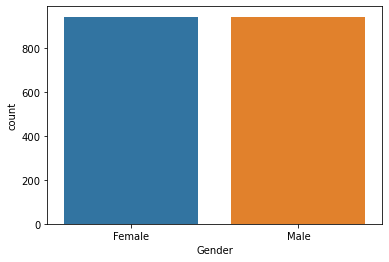

In [19]:
# see proportions of the First 5 features


sns.countplot(dataset["Gender"])
# we have almost the same number of male and female in our dataset 

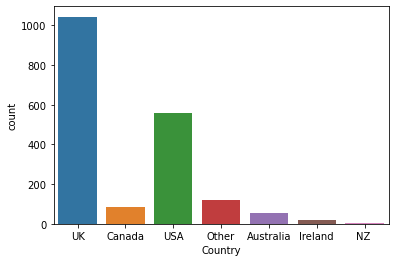

In [20]:
# visualize the proportions of current residence country 

sns.countplot(dataset["Country"])
#UK and USA are the most represented here

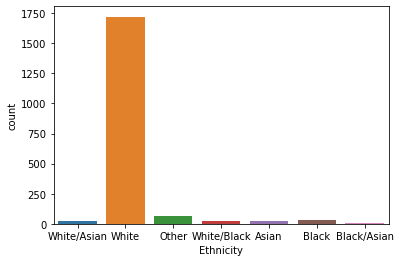

In [21]:
#Same thing for ethnicity 

sns.countplot(dataset["Ethnicity"])

#huge proportion of participants are white

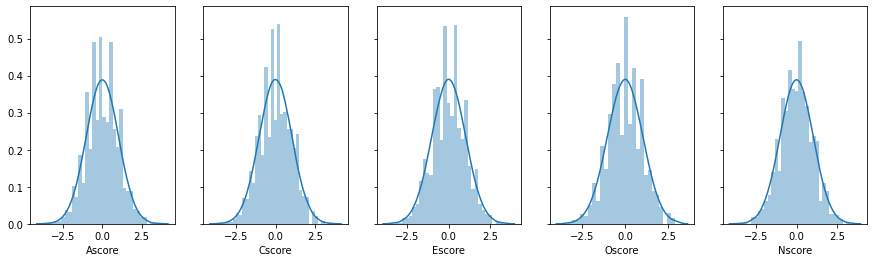

In [22]:
# Now, let's try to visualise the distribution of dimensions of NEO Personality Inventory on our sample.

NEO = list(set(numericals)-set(['SS','Impulsive']))

n = len(NEO)
i=0
fig, axes = plt.subplots(1, n, figsize=(15, 4), sharey=True)
for element in NEO:
    sns.distplot(dataset[element], ax=axes[i])
    i+=1

Score seems to be distibuted like a Normal distibution -> need to scale or not ? 

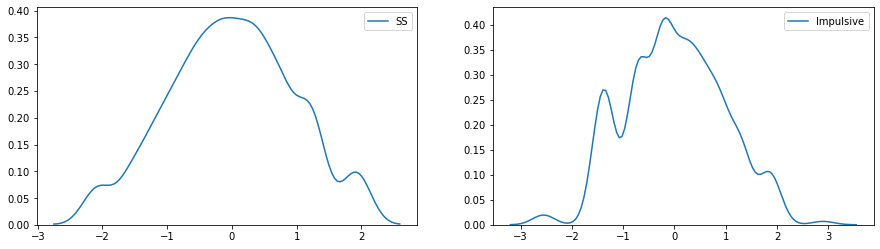

In [23]:
# for SS and implusive 

SS_IMP = ['SS','Impulsive']

fig , axes = plt.subplots(1,2,figsize = (15,4))
i=0
for element in SS_IMP:
    sns.kdeplot(dataset[element],ax=axes[i])
    i+=1

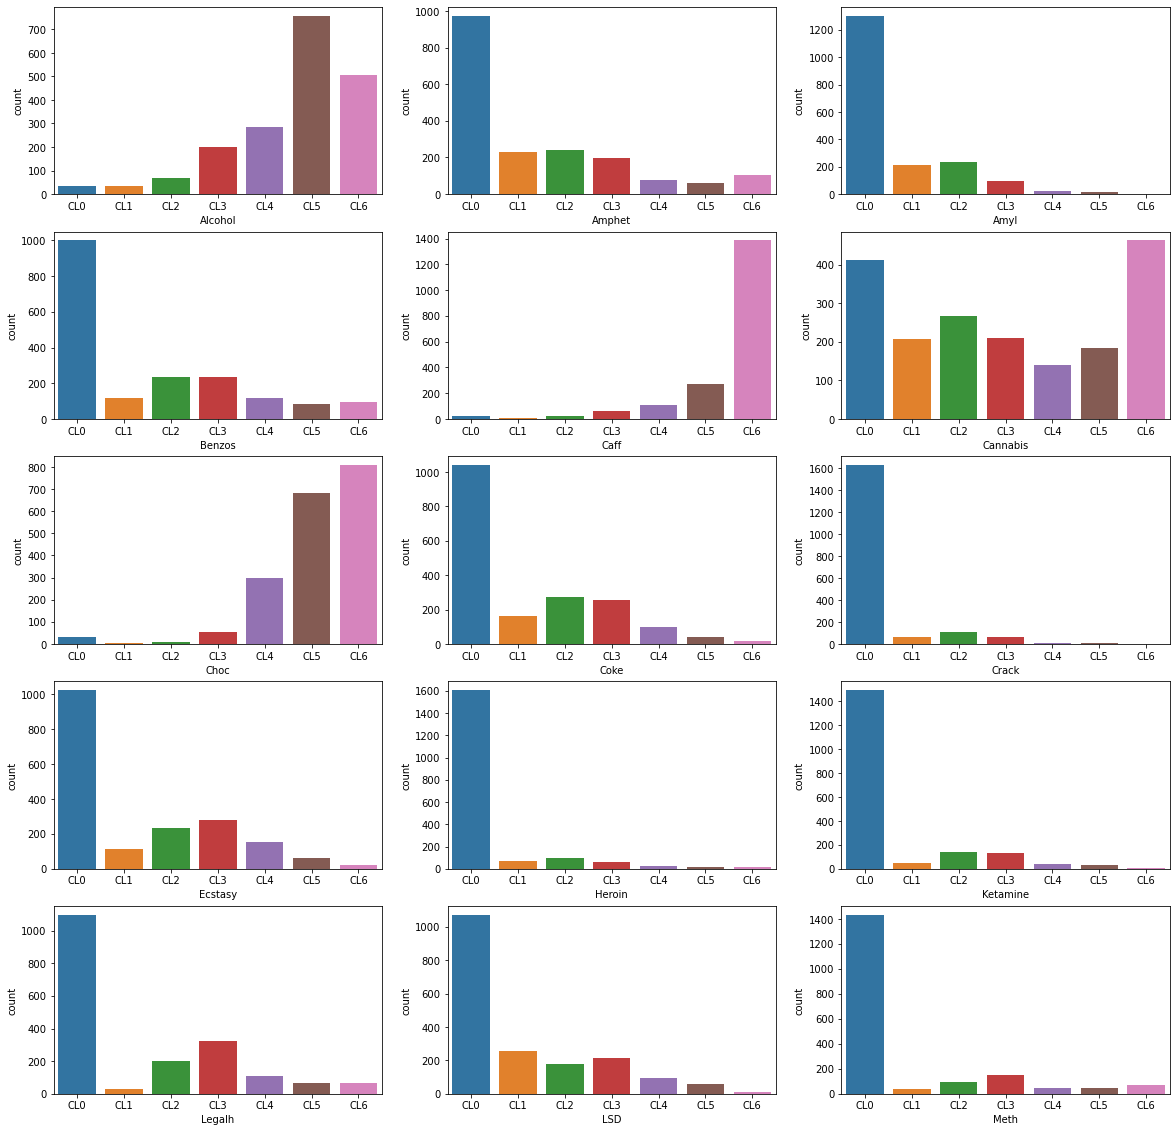

In [24]:
# visualition for the drugs

fig , axes = plt.subplots(5,3,figsize=(20,20))
drugs = ['Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA']
c=0
for i in range(5):
    for j in range(3):
        sns.countplot(dataset[drugs[c]],ax=axes[i][j])
        c+=1

we can see that "legal" or "almost-legal" drugs are highly use (caf,choc, nicotine, canibis,legalh, benzos)

May be we could try to classify drugs into two subparts such as legal an not legal ? 

May be it could help to see the influence of the law about drug consumption s

May be we can visualise the proportions of user and non user for each drug too 